In [1]:
# import cv2
# import argparse
# from pathlib import Path

# # Usa o Haar Cascade pré-treinado que já vem com o OpenCV
# CASCADE_PATH = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# def draw_and_save_faces(frame, faces):
#     # Desenha as caixas
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
#     return frame

In [2]:
# def detect_in_image(image_path, out_dir):
#     img = cv2.imread(image_path)
#     if img is None:
#         raise FileNotFoundError(f"Não foi possível abrir: {image_path}")

#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     detector = cv2.CascadeClassifier(CASCADE_PATH)

#     faces = detector.detectMultiScale(
#         gray,
#         scaleFactor=1.1,      # ajuste fino de pirâmide
#         minNeighbors=5,       # quão estrita é a validação
#         minSize=(30, 30)      # ignora rostos menores que isso
#     )

#     annotated = draw_and_save_faces(img.copy(), faces)
#     out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)
#     out_path = out_dir / f"faces_{Path(image_path).stem}.jpg"
#     cv2.imwrite(str(out_path), annotated)
#     print(f"Rostos detectados: {len(faces)} | Salvo em: {out_path}")

# def detect_in_video(source=0):
#     detector = cv2.CascadeClassifier(CASCADE_PATH)
#     cap = cv2.VideoCapture(source)
#     if not cap.isOpened():
#         raise RuntimeError("Não foi possível abrir a câmera/vídeo.")

#     print("Pressione 'q' para sair.")
#     while True:
#         ok, frame = cap.read()
#         if not ok:
#             break
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#         frame = draw_and_save_faces(frame, faces)
#         cv2.imshow("Detecção de Rostos (HaarCascade)", frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()


In [3]:
# import cv2, os
# print("haar dir:", cv2.data.haarcascades)
# p = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
# print("existe?", os.path.exists(p), "|", p)

In [4]:
# import cv2
# from pathlib import Path
# from urllib.request import urlretrieve

# # ======= CONFIG =======
# IMAGE_PATH = r"C:\Users\elder\Downloads\Mulher_rosto01.jpg"  # sua imagem
# OUT_DIR = Path("outputs")
# MODELS_DIR = Path("models")
# CASCADE_FILES = [
#     "haarcascade_frontalface_default.xml",
#     "haarcascade_frontalface_alt2.xml",
# ]
# CASCADE_URLS = {
#     "haarcascade_frontalface_default.xml":
#         "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml",
#     "haarcascade_frontalface_alt2.xml":
#         "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_alt2.xml",
# }
# # ======================

# def try_load_cascade(path_str: str):
#     det = cv2.CascadeClassifier(path_str)
#     return det if not det.empty() else None

# def ensure_working_cascade():
#     MODELS_DIR.mkdir(parents=True, exist_ok=True)

#     # 1) Tenta cascades locais já baixados
#     for fname in CASCADE_FILES:
#         p = MODELS_DIR / fname
#         if p.exists():
#             det = try_load_cascade(str(p))
#             if det is not None:
#                 return det

#     # 2) Tenta os que vêm com o OpenCV
#     for fname in CASCADE_FILES:
#         p = Path(cv2.data.haarcascades) / fname
#         if p.exists():
#             det = try_load_cascade(str(p))
#             if det is not None:
#                 return det

#     # 3) Baixa do repositório oficial e valida
#     for fname in CASCADE_FILES:
#         url = CASCADE_URLS[fname]
#         dest = MODELS_DIR / fname
#         print(f"Baixando {fname}...")
#         urlretrieve(url, dest)
#         det = try_load_cascade(str(dest))
#         if det is not None:
#             return det

#     raise RuntimeError("Não foi possível obter um Haar Cascade funcional.")

# def main():
#     OUT_DIR.mkdir(parents=True, exist_ok=True)

#     img = cv2.imread(IMAGE_PATH)
#     if img is None:
#         raise FileNotFoundError(f"Não foi possível abrir a imagem: {IMAGE_PATH}")

#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     detector = ensure_working_cascade()

#     faces = detector.detectMultiScale(
#         gray,
#         scaleFactor=1.1,
#         minNeighbors=5,
#         minSize=(30, 30)
#     )

#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

#     out_path = OUT_DIR / f"faces_{Path(IMAGE_PATH).stem}.jpg"
#     cv2.imwrite(str(out_path), img)

#     print(f"Rostos detectados: {len(faces)}")
#     print(f"Imagem anotada salva em: {out_path.resolve()}")

# if __name__ == "__main__":
#     main()


Rostos detectados: 1
Imagem anotada: C:\Users\elder\OneDrive\Área de Trabalho\IA_engineering\detect_faces\outputs\faces_Mulher_rosto01.jpg


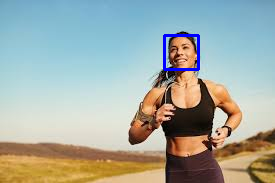

In [12]:
# detect_single_image.py
import cv2
from pathlib import Path
from urllib.request import urlretrieve
from IPython.display import display
from PIL import Image

# === CONFIGURE AQUI ===
IMAGE_PATH = r"C:\Users\elder\Downloads\Mulher_rosto01.jpg"
OUT_DIR = Path("outputs")
MODELS_DIR = Path("models")
CASCADE_FILES = [
    "haarcascade_frontalface_default.xml",
    "haarcascade_frontalface_alt2.xml",
]
CASCADE_URLS = {
    "haarcascade_frontalface_default.xml":
        "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml",
    "haarcascade_frontalface_alt2.xml":
        "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_alt2.xml",
}
# ======================

def _try_load(path_str: str):
    det = cv2.CascadeClassifier(path_str)
    return det if not det.empty() else None

def ensure_working_cascade():
    MODELS_DIR.mkdir(parents=True, exist_ok=True)

    # 1) Já baixados localmente
    for fname in CASCADE_FILES:
        p = MODELS_DIR / fname
        if p.exists():
            det = _try_load(str(p))
            if det is not None:
                return det

    # 2) Os que vêm com o OpenCV
    for fname in CASCADE_FILES:
        p = Path(cv2.data.haarcascades) / fname
        if p.exists():
            det = _try_load(str(p))
            if det is not None:
                return det

    # 3) Baixa do repositório oficial
    for fname in CASCADE_FILES:
        url = CASCADE_URLS[fname]
        dest = MODELS_DIR / fname
        print(f"Baixando {fname}...")
        urlretrieve(url, dest)
        det = _try_load(str(dest))
        if det is not None:
            return det

    raise RuntimeError("Não foi possível obter um Haar Cascade funcional.")

def main():
    OUT_DIR.mkdir(parents=True, exist_ok=True)

    img = cv2.imread(IMAGE_PATH)
    if img is None:
        raise FileNotFoundError(f"Não foi possível abrir: {IMAGE_PATH}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = ensure_working_cascade()

    faces = detector.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    out_path = OUT_DIR / f"faces_{Path(IMAGE_PATH).stem}.jpg"
    cv2.imwrite(str(out_path), img)
    print(f"Rostos detectados: {len(faces)}")
    print(f"Imagem anotada: {out_path.resolve()}")

    # no final, depois de desenhar as caixas em `img`:
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

if __name__ == "__main__":
    main()


Rostos detectados: 1
[0] Female | conf=0.990 | bbox=(x=164, y=35, w=34, h=34)
Imagem anotada salva em: C:\Users\elder\OneDrive\Área de Trabalho\IA_engineering\detect_faces\outputs\gender_Mulher_rosto01.jpg


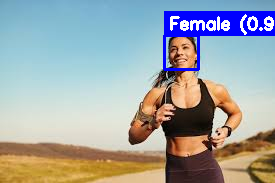

In [14]:
# gender_single_image.py
import cv2
import numpy as np
from pathlib import Path
from urllib.request import urlretrieve
from IPython.display import display
from PIL import Image

# ======= CONFIG =======
IMAGE_PATH = r"C:\Users\elder\Downloads\Mulher_rosto01.jpg"
OUT_DIR = Path("outputs"); OUT_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR = Path("models"); MODELS_DIR.mkdir(parents=True, exist_ok=True)

HAAR_FILES = ["haarcascade_frontalface_default.xml", "haarcascade_frontalface_alt2.xml"]
HAAR_URLS = {
    "haarcascade_frontalface_default.xml":
        "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml",
    "haarcascade_frontalface_alt2.xml":
        "https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_alt2.xml",
}

GENDER_PROTO = MODELS_DIR / "gender_deploy.prototxt"
GENDER_MODEL = MODELS_DIR / "gender_net.caffemodel"
GENDER_PROTO_URL  = "https://huggingface.co/AjaySharma/genderDetection/raw/5cde30ccaa3ebff2e3d06876bf6412f19be183c3/gender_deploy.prototxt"
GENDER_MODEL_URL  = "https://www.dropbox.com/scl/fi/j7gcbj1l3ur6r8jdf3k7k/gender_net.caffemodel?rlkey=g7us6rvnw8ji7z64d5zy002h4&dl=1"

GENDER_LABELS = ["Male", "Female"]
GENDER_SIZE = (227, 227)
GENDER_MEAN = (78.4263377603, 87.7689143744, 114.895847746)  # BGR
# ======================

def _download_if_missing(path: Path, url: str):
    if not path.exists():
        print(f"Baixando {path.name} ...")
        urlretrieve(url, path)

def ensure_haar():
    # locais
    for fname in HAAR_FILES:
        p = MODELS_DIR / fname
        if p.exists():
            det = cv2.CascadeClassifier(str(p))
            if not det.empty():
                return det
    # do OpenCV
    for fname in HAAR_FILES:
        p = Path(cv2.data.haarcascades) / fname
        if p.exists():
            det = cv2.CascadeClassifier(str(p))
            if not det.empty():
                return det
    # baixar
    for fname in HAAR_FILES:
        _download_if_missing(MODELS_DIR / fname, HAAR_URLS[fname])
        det = cv2.CascadeClassifier(str(MODELS_DIR / fname))
        if not det.empty():
            return det
    raise RuntimeError("Não foi possível carregar um Haar Cascade funcional.")

def ensure_gender_net():
    _download_if_missing(GENDER_PROTO, GENDER_PROTO_URL)
    _download_if_missing(GENDER_MODEL, GENDER_MODEL_URL)
    net = cv2.dnn.readNetFromCaffe(str(GENDER_PROTO), str(GENDER_MODEL))
    return net

def classify_gender(net, face_bgr):
    blob = cv2.dnn.blobFromImage(face_bgr, 1.0, GENDER_SIZE, GENDER_MEAN, swapRB=False, crop=False)
    net.setInput(blob)
    probs = net.forward()[0]
    j = int(np.argmax(probs))
    return GENDER_LABELS[j], float(probs[j])

def main():
    img = cv2.imread(IMAGE_PATH)
    if img is None:
        raise FileNotFoundError(f"Não foi possível abrir: {IMAGE_PATH}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_det = ensure_haar()
    gender_net = ensure_gender_net()

    faces = face_det.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))
    print(f"Rostos detectados: {len(faces)}")

    for idx, (x, y, w, h) in enumerate(faces):
        pad = int(0.2 * w)
        x1 = max(0, x - pad); y1 = max(0, y - pad)
        x2 = min(img.shape[1], x + w + pad); y2 = min(img.shape[0], y + h + pad)
        face = img[y1:y2, x1:x2]

        label, conf = classify_gender(gender_net, face)
        print(f"[{idx}] {label} | conf={conf:.3f} | bbox=(x={x}, y={y}, w={w}, h={h})")

        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        txt = f"{label} ({conf:.2f})"
        cv2.rectangle(img, (x, y - 24), (x + max(120, w), y), (255, 0, 0), -1)
        cv2.putText(img, txt, (x + 5, y - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 255, 255), 2)

    out_path = OUT_DIR / f"gender_{Path(IMAGE_PATH).stem}.jpg"
    cv2.imwrite(str(out_path), img)
    print(f"Imagem anotada salva em: {out_path.resolve()}")

    # # === EXIBIR NA TELA ===
    # cv2.imshow("Resultado - Pressione qualquer tecla para fechar", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # no final, depois de desenhar as caixas em `img`:
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

if __name__ == "__main__":
    main()
